In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
employee_names = {'employee_name': ['Rizwan', 'Nafees', 'Chitan', 'Nanku', 'Shipla', 'Jyoti', 'Nancy']}
service_category = ['job_work', 'product', 'pkg_service']

In [328]:
data = pd.read_excel('DSR Nov 2019 Yash Ariyan.xlsx', header=4)

In [329]:
# Dropping NearBy column (for now)
data.drop(['JOB WORK.8','Unnamed: 25','JOB WORK.7', 'PRODUCT.7', 'Package Service.7'], axis=1, inplace=True)
data.head(3)

,JOB WORK,PRODUCT,Package Service,JOB WORK.1,PRODUCT.1,Package Service.1,JOB WORK.2,PRODUCT.2,Package Service.2,JOB WORK.3,...,Package Service.3,JOB WORK.4,PRODUCT.4,Package Service.4,JOB WORK.5,PRODUCT.5,Package Service.5,JOB WORK.6,PRODUCT.6,Package Service.6
2019-11-01 00:00:00,8560,0,0,0,0,0,550,0,0,0,...,0,500,0,0,0,0,0,0,0,0
2019-11-02 00:00:00,1530,780,0,550,0,0,1250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-11-03 00:00:00,2850,0,0,800,0,0,1000,0,0,0,...,0,130,0,0,1000,0,0,0,0,0


In [330]:
data.index[0]

datetime.datetime(2019, 11, 1, 0, 0)

In [331]:
data.columns

Index(['JOB WORK', 'PRODUCT', 'Package Service', 'JOB WORK.1', 'PRODUCT.1',
       'Package Service.1', 'JOB WORK.2', 'PRODUCT.2', 'Package Service.2',
       'JOB WORK.3', 'PRODUCT.3', 'Package Service.3', 'JOB WORK.4',
       'PRODUCT.4', 'Package Service.4', 'JOB WORK.5', 'PRODUCT.5',
       'Package Service.5', 'JOB WORK.6', 'PRODUCT.6', 'Package Service.6'],
      dtype='object')

In [332]:
data.iloc[:,0].values

array([  8560,   1530,   2850,   1530,   1050,      0,   3500,   1120,
          100,    940,    470,   6600,   2940,   3740,    350,    600,
        10350,      0,   7455,   6175,   1190,   7770,   2830,   2320,
            0,      0,  12160,   4052,   8560,   2411,      0, 101153],
      dtype=int64)

In [333]:
# Uncomment and Run cell to drop the DATE column from the dataframe

# data.drop('DATE', axis=1,inplace=True)
# data.head(3)

In [334]:
data_clean = {'date':{},'employee_name':{}}
x=0
for category in service_category:
    
    if category not in data_clean.keys():
        data_clean[category] = {}
        
df = pd.DataFrame(data_clean)
print("Column names - ", df.columns)
print("Is the dataframe empty ?", "Yes" if (df.shape[0]==0) else "NO")

Column names -  Index(['date', 'employee_name', 'job_work', 'product', 'pkg_service'], dtype='object')
Is the dataframe empty ? Yes


In [335]:


n = 3
colrange = len(data.columns)
rowrange = data.shape[0]

for i in range(int(colrange / 3)):
    for j in range(rowrange):
        
        date = data.index[j]
        employee = employee_names['employee_name'][i]
        jwork = data.iloc[:,n*i].values[j]
        prod =  data.iloc[:,n*i+1].values[j]
        pkg = data.iloc[:,n*i+2].values[j]
        
        new_row = {'date':date,
                   'employee_name': employee,
                   'job_work': jwork,
                   'product': prod,
                   'pkg_service': pkg}
        
        df = df.append(new_row, ignore_index=True)
        
        
# df.dropna(inplace=True)
df.set_index('date', inplace=True)

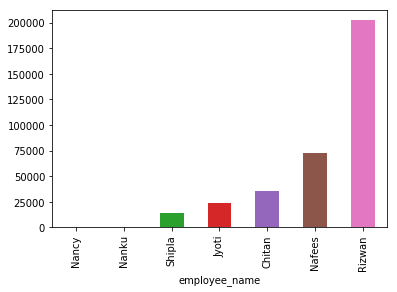

In [336]:
sales_sum = df.groupby('employee_name').sum().sort_values(['job_work'])

sales_sum['job_work'].plot(kind='bar')
plt.show()

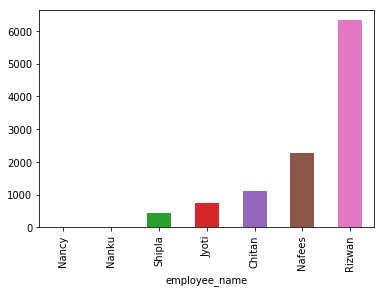

In [337]:
sales_mean = df.groupby('employee_name').mean()
sales_mean_sorted = sales_mean.sort_values(['job_work'])

sales_mean_sorted['job_work'].plot(kind='bar')
plt.show()

In [338]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [339]:
def plot_emp_hist(df, employee_name_list):
    
    
    fig, axs = plt.subplots(3,3, figsize=(20,10))
    col=0
    row=0
    for employee_name in employee_name_list:
        rf = df.loc[df.employee_name == employee_name]

        # Removes rows indexed as nan and total
        rf.drop(rf.tail(2).index, inplace=True)

        rf.job_work.hist(ax=axs[row,col], bins=[0,2000,4000,6000,8000,10000,12000,14000])
        plt.title(employee_name)
        
        if col == 2 or col == 5:
            col=0
        else:
            col += 1
        if col == 2 or col == 5 or col==8:
            row += 1
        
        
#     plt.xlabel('Sales per Day')
#     plt.ylabel('Frequency')
    plt.show()

In [303]:
employee_name = employee_names['employee_name']
employee_name

['Rizwan', 'Nafees', 'Chitan', 'Nanku', 'Shipla', 'Jyoti', 'Nancy']

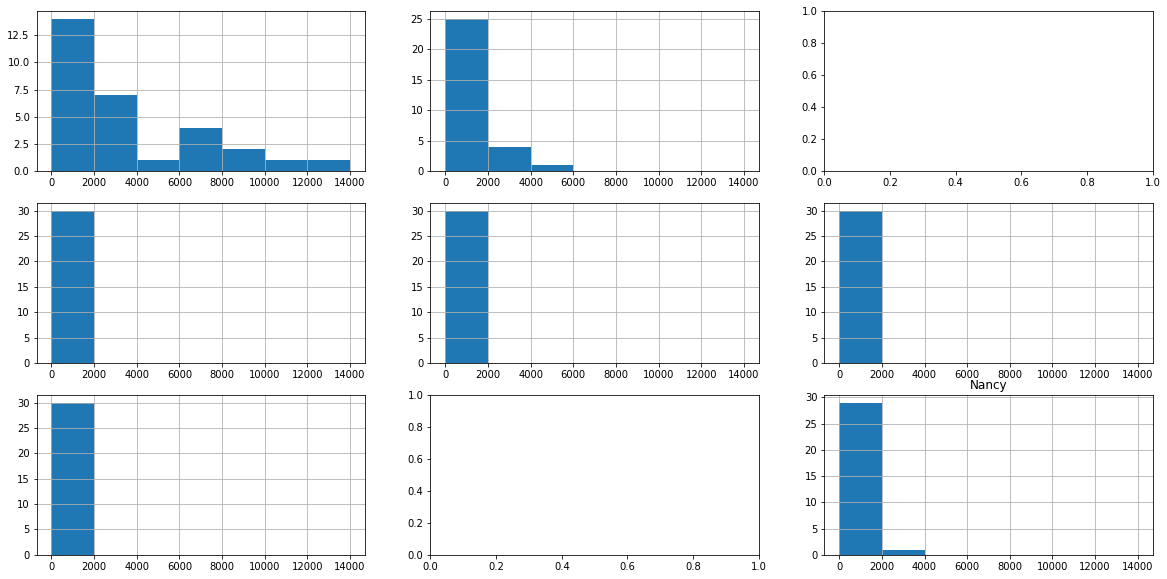

In [340]:
plot_emp_hist(df, employee_name)

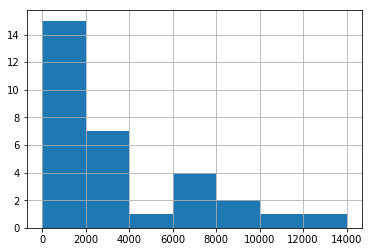

In [343]:
rf = df.loc[df.employee_name == 'Rizwan']

# Removes rows indexed as nan and total
# rf.drop(rf.tail(2).index, inplace=True)

rf.job_work.hist(bins=[0,2000,4000,6000,8000,10000,12000,14000])
# plt.title(employee_name)
plt.show()